# Régression - Prédiction des coûts d'assurance maladie
Projet de Data Science - Séminaire "Data Science, ML et IA" Travail Pratique pour la Microcertification

### <span style="color:blue">Introduction</span>

Les coûts de la santé représentent un enjeu crucial pour les systèmes d'assurance, les citoyens ainsi que pour les politiques publiques. L'estimation et l'analyse des dépenses dans le domaine médical permettraient un ajustement des offres, une amélioration de ces dernières, une meilleure gestion des risques ainsi que des tarifs plus équitables.

Le projet se base sur un set de données recueillant les caractéristiques personnelles d'un groupe d'individus ainsi que leurs dépenses dans le domaine médical.
Afin de prédire les coûts des dépenses, nous utiliserons des techniques de Data Science telles que l'exploration des données, l'évaluation et l'interprétation des modèles prédictifs ainsi que le machine learing.

### <span style="color:blue">Problématique</span>
**Est-il possible de prédire le coût annuel de l'assurance maladie d'une personne en partant de ses caractéristiques personnelles, telles l'âge, le sexe, la région habitée, l'indice de masse corporelle (IMC - estimation de la corpulence d'une personne), le nombre d'enfants à charge et le statut de fumeur ?**

La problématique correspond à un problème de régression supervisée avec, comme variable cible, les charges médicales annuelles.

### <span style="color:blue">Objectifs du projet</span>
Le projet a pour objectifs les points suivants :

- Comprendre et effectuer l'exploration du jeu de données utilisé
- Identifier les caractéristiques (features) influençant le coût de l'assurance maladie
- Préparer le jeu de données pour effectuer la modélisation
- Tester et commenter différents modèles de machine learning
- Comparer les résultats des modèles
- Interpréter les résultats des modèles obtenus
- Commenter les limites et les possibles améliorations

Ces objectifs permettront une illustration claire et structurée des étapes principales d'un projet de Data Science en se basant sur des données présélectionnées.

Nous comparerons :
- Regression linéaire
- K-Nearest Neighbors (KNN)
- Arbre de décision
- Bagging – Random Forest Regressor
- Boosting – Gradient Boosting Regressor

### <span style="color:blue">Etude des données</span>
Les données utilisées pour ce projet viennent du site Kaggle - Medical Cost Personal Dataset :
https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download

Le fichier utilisé contient au total 1338 lignes, chacune correspondant à une personne.

Le fichier contient 7 colonnes :
- Age : âge de la personne
- Sex : sexe de la personne
- BMI : IMC - Indice de masse corporelle
- Children : nombre d'enfants à charge
- Smoker : statut de fumeur
- Region : région habitée (USA)
- Charges : coûts médicaux facturés

La feature "charges" est la variable cible à prédire, ce que nous allons essayer d'effectuer le long de ce projet.

### <span style="color:blue">Typologie du problème</span>

Ce problème se base sur une régression supervisée, car la variable cible à prédire (charges) est une valeur numérique continue.

En effet, la régression supervisée a pour but d'apprendre à effectuer une prédiction en se basant sur une valeur numérique à partir d'exemples connus en ayant déjà la bonne réponse.
Le modèle a pour but d'apprendre la relation qu'il y a entre les variables du set de données et la variable cible (ici les charges).

Plusieurs algorithmes peuvent être utilisés pour atteindre cet objectif, ce que nous allons découvrir le long du projet.

Pour commencer, nous allons récupérer les données qui seront la base pour nos analyse tout au long du projet.

In [1]:
# Chargement du jeu de données à l'aide de la bibliothèque Pandas
import pandas as pd

# Le fichier téléchargé - insurance.csv - est stocké dans le dossier "Data" du projet
df = pd.read_csv("data/insurance.csv")

# Affichage des 5 premières lignes du set de données afin d'avoir un aperçu de la structure
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Analyse exploratoire des données (AED)
L'**analyse exploratoire des données (AED)**, une étape importante qui permet de mieux comprendre la structure ainsi que la qualité des données. De plus, grâce à cette analyse, nous pouvons repérer les caractéristiques du jeu de données avant de commencer la modélisation.

In [2]:
# Affichage de la dimension du dataset (lignes, colonnes)
df.shape

(1338, 7)

In [3]:
# Informations sur le set de données : type des données ainsi que les éventuelles valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Il est possible de voir que le set de données n'a pas de valeurs manquantes, un point positif pour la préparation des données.

In [4]:
# Affichage des statistiques du set de données
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Ces statistiques prennent en considération les colonnes des valeurs numériques du set de données et permettent d'avoir une vue globale sur les données.

Les statistiques nous montrent :
- La moyenne (mean)
- L'écart type (std)
- La valeur minimale de la colonne sur l'entièreté du set (min)
- Les quartiles (25%, 50%, 75%)
- La valeur maximale de la colonne sur l'entièreté du set (max)

Ces premières statistiques nous donnent déjà la possiblité d'effectuer une analyse rapide. En effet, il est déjà possible d'en déduire que le coût moyen de l'assurance est assez élevé et qu'il est fortement variable entre les individus.

In [5]:
# Valeurs uniques par variable catégorielle (valeurs qualitatives)
df['sex'].value_counts(), df['smoker'].value_counts(), df['region'].value_counts()

(sex
 male      676
 female    662
 Name: count, dtype: int64,
 smoker
 no     1064
 yes     274
 Name: count, dtype: int64,
 region
 southeast    364
 southwest    325
 northwest    325
 northeast    324
 Name: count, dtype: int64)

Avec cette analyse, il est possible d'avoir une idée quant à la distribution des catégories des variables qualitatives.

Il est possible d'observer que la proportion entre hommes et femmes est assez homogène, et que le nombre de fumeurs et moins élevé que celui des non-fumeurs.

In [6]:
# Librairies utilisées pour la modélisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Distribution des coûts

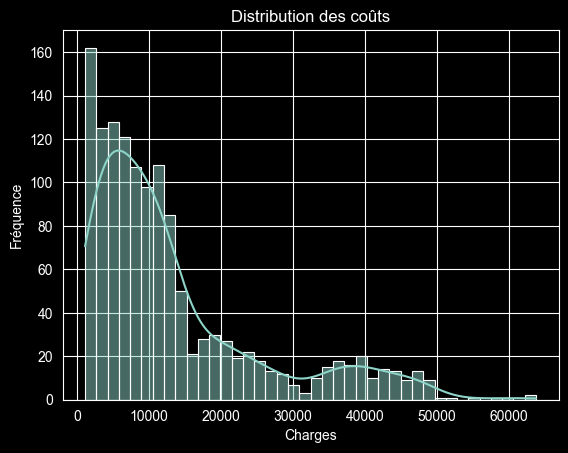

In [7]:
# Histogramme basé sur la variable "charges" avec des intervalles et une courbe de densité afin de montrer la tendance de la distribution
sns.histplot(df['charges'], bins=40, kde=True)

# Titre du graphique
plt.title("Distribution des coûts")

# Nom du label de l'axe X
plt.xlabel("Charges")

# Nom du label de l'axe Y
# Nombre de personnes dont les coûts sont compris dans l'intervalle représenté dans l'histogramme
plt.ylabel("Fréquence")

# Affichage de l'histogramme
plt.show()


<span style="color:slateblue">**Description de l'histogramme**</span> <br>
Dans ce graphique, nous pouvons analyser, pour chaque plage (intervalle) de coûts, combien de personnes sont concernées (combien de personnes ont des coûts correspondant à cet intervalle). La courbe représente l'estimation de la distribution pour voir la tendance générale.

<span style="color:slateblue">**Interprétation**</span> <br>
Les coûts d’assurance présentent une forte variabilité entre les individus, avec une distribution asymétrique vers la droite.
Cette asymétrie traduit la présence de coûts très élevés pour une partie de la population et suggère une structure multimodale.
La distribution semble indiquer l’existence de trois groupes principaux : un groupe avec des coûts faibles, un groupe avec des coûts intermédiaires et un groupe avec des coûts élevés.
À ce stade de l’analyse exploratoire, il n’est pas possible de déterminer avec certitude les causes de cette structure.
Cependant, on peut émettre l’hypothèse que certains facteurs individuels influencent fortement les coûts, notamment le statut de fumeur, qui pourrait expliquer la présence du groupe aux coûts les plus élevés.
Afin de mieux comprendre cette asymétrie et cette possible segmentation de la population, une analyse des coûts par catégories sera réalisée dans la suite de l’étude.


#### Charges selon statut de fumeur

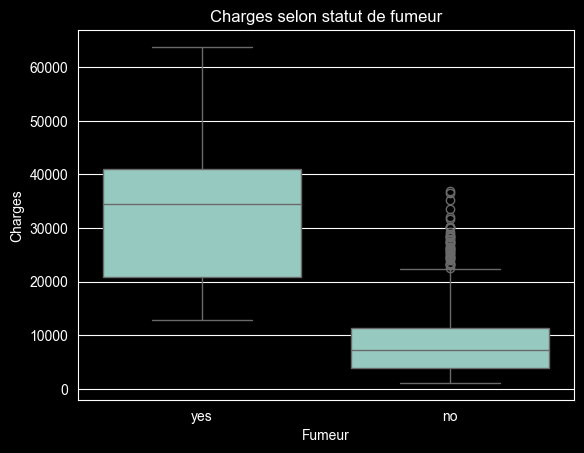

In [8]:
# Création d'un boxplot (boîte à moustaches) avec la librairie seaborn
# Graphique basé sur la variable catégorielle "smoker" et la variable numérique "charges"
sns.boxplot(x='smoker', y='charges', data=df)

# Titre du graphique
plt.title("Charges selon statut de fumeur")

# Titre de la colonne x
plt.xlabel("Fumeur")

# Titre de la colonne y
plt.ylabel("Charges")

# Affichage du graphique
plt.show()

Ce graphique permet une comparaison entre la distribution des coûts des fumeurs et des non-fumeurs.

<span style="color:slateblue">**Description du boxplot**</span> <br>
- Médiane, ligne dans la boîte
- Quartiles, 25% et 75%, les extrémités de la boîte
- Moustaches, valeurs approximatives extrêmes, la plus grande et la plus petite
- Outliers, valeurs atypiques, points isolés

<span style="color:slateblue">**Interprétation**</span> <br>
Le graphique représentant les coûts selon le statut de fumeur montre que les fumeurs présentent, en moyenne, des coûts significativement plus élevés que les non-fumeurs.
La médiane ainsi que la dispersion des coûts sont nettement supérieures pour les individus fumeurs, indiquant une variabilité accrue des dépenses médicales dans ce groupe.

En lien avec la distribution globale des coûts, cette observation suggère que le groupe d’individus correspondant au pic de coûts élevés est majoritairement composé de fumeurs.
Ainsi, le tabagisme apparaît comme un facteur fortement associé à l’augmentation des dépenses médicales.


#### Relation entre IMC et charges
Le BMI (Body Mass Index) est un nombre reliant le poids et la taille, décrit par la formule suivante :

$${BMI} = \frac{\text{Poids (kg)}}{\text{Taille (m)}^2}$$

Cet indice permet d'avoir une idée de la corpulence d'une personne. Selon les standards de l'OMS, ce dernier indique (https://www.who.int/data/gho/data/themes/topics/topic-details/GHO/body-mass-index) :

- <18.5 : insuffisance pondérale
- 18.5 - 24.9 : poids normal
- 25 - 29.9 : surpoids
- 30 - 34.0 : obésité modérée (classe I)
- 35 - 39.9 : obésité sévère (classe II)
- '>= 40 : obésité morbide (classe III)

Cet indice a des limites et est à considérer comme indication générale, non pas comme diagnostic médical.
Cependant, dans le cadre de notre étude, il est intéressant de découvrir si l'IMC a une corrélation avec les dépenses médicales des individus.

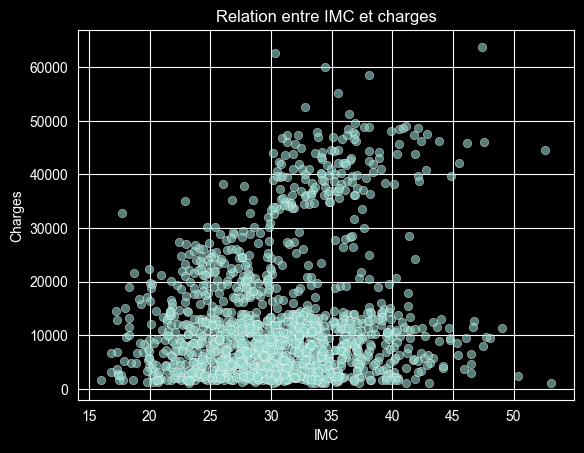

In [9]:
# Création d'un scatter plot (nuage de points) avec la librairie seaborn
# Graphique basé sur les variables numériques "BMI" et "charges"
# Alpha : transparence des points (0 = invisible, 1 = opaque)
sns.scatterplot(x='bmi', y='charges', data=df, alpha=0.6)

# Titre du graphique
plt.title("Relation entre IMC et charges")

# Titre de la colonne x
plt.xlabel("IMC")

# Titre de la colonne y
plt.ylabel("Charges")

# Affichage du graphique
plt.show()

<span style="color:slateblue">**Description du scatter plot**</span> <br>
Les points représentent les individus. Plus les points sont concentrés, plus il y a d'individus dans le même cas de figure.



<span style="color:slateblue">**Interprétation**</span> <br>
Il est possible de voir que la majorité de la population a un IMC compris entre 20 et 40 avec des charges se situant entre 2'000 et 15'000 dollars. Cependant, une forte variabilité est présente, ceci détermine une grande dispersion des charges pour un même IMC.
La relation entre l'augmentation de l'IMC et des charges n'est pas linéaire, même si avec l'augmentation de l'IMC les charges ont tendance à augmenter.

Il est possible de retrouver des valeurs extrêmes, des charges très élevées pour des IMC moyens et élevés.

Les charges deviennent plus variables pour les personnes ayant un IMC élevé, ceci est démontré par la dispersion des points.

Ces analyses suggèrent que l'IMC seul, ne suffit pas pour déterminer et expliquer la valeur des dépenses. D'autres facteurs sont à prendre en considération pour une analyse plus fiable.

#### Relation entre âge et charges

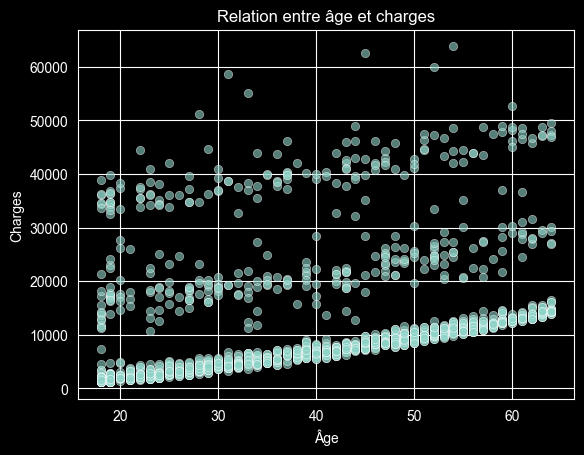

In [10]:
# Création d'un scatter plot (nuage de points) avec la librairie seaborn
# Graphique basé sur les variables numériques "age" et "charges"
# Alpha : transparence des points (0 = invisible, 1 = opaque)
sns.scatterplot(x='age', y='charges', data=df, alpha=0.6)

# Titre du graphique
plt.title("Relation entre âge et charges")

# Titre de la colonne x
plt.xlabel('Âge')

# Titre de la colonne y
plt.ylabel('Charges')

# Affichage du graphique
plt.show()


<span style="color:slateblue">**Description du scatter plot**</span> <br>
Comme pour le graphique précédent, les points représentent les individus. Plus les points sont concentrés, plus il y a d'individus dans le même cas de figure.

<span style="color:slateblue">**Interprétation**</span> <br>
La tendance générale est à la hausse avec l'augmentation de l'âge. Les points sont répartis par bandes, ce qui indique l’existence de plusieurs sous-populations.<br>
Les dépenses augmentent pour les personnes âgées de manière générale à partir de l'âge de 40 ans.
Ces bandes correspondent à différents profils de risque, notamment liés au tabagisme et à d’autres facteurs comme le BMI.
On peut donc déterminer que l'âge est un facteur important pour l'augmentation des dépenses, mais, comme pour l'IMC, il n'est pas suffisant pour déterminer de manière définitive le niveau des dépenses au vu de la variabilité que nous pouvons observer dans le graphique.

#### Matrice de corrélation
Afin de déterminer la corrélation entre les variables et les dépenses, nous allons construire une matrice de corrélation.

Cette dernière nous permettra de déterminer quelles variables sont liées entre elles. De plus, on pourra sélectionner les variables les plus corrélées avec la variable cible (les charges). Pour finir, cela nous aidera à choisir les facteurs les plus pertinents pour la prédiction des dépenses.

La matrice que nous allons analyser ne concerne que les valeurs numériques présentes dans notre set de données (âge, BMI et le nombre d'enfants). Les valeurs catégorielles (statut de fumeur et région) ne sont pas prises en considération.

Les cases présentent un chiffre allant de -1 à +1, qui mesure la force et le sens de relation linéaire entre deux variables.

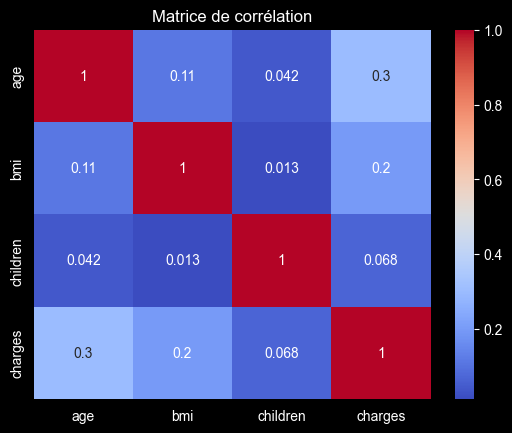

In [11]:
# Création d'une heatmap pour visualiser la matrice de corrélation
# df.corr(numeric_only=True) : calcule les corrélations entre les colonnes numériques du dataset
# annot=True : affiche les valeurs de corrélation dans chaque case
# cmap="coolwarm" : palette de couleurs allant du bleu (corrélation négative) au rouge (corrélation positive)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")

# Ajout d'un titre au graphique
plt.title("Matrice de corrélation")

# Affichage du graphique
plt.show()


Charges - Age : relation positive modérée <br>
Charges - BMI : relation positive faible <br>
Charges - Children : relation très faible

Les autres relations sortent du cadre de notre projet (estimation des coûts médicaux). Cependant, elles restent intéressantes pour d'autres études, telles que le nombre d'enfants à charge selon l'âge des individus, etc.

Cette analyse exploratoire avec des modèles graphiques nous aide à identifier les relations entre variables et à nous guider pour la sélection des modèles.

## Préparation des donnes et Feature Engineering

Avant d'effectuer l'entraînement des modèles de Machine Learning, après l'analyse des données, ces dernières doivent être préparées.

Afin d'effectuer la préparation, il faut :

- Séparer les variables explicatives (âge, sexe, enfants, IMC) de la variable cible (charges)
- Encoder les variables catégorielles (non numériques)
- Normaliser les variables numériques

Définition de la variable "charges" comme variable cible (y), et les autres comme variables explicatives (x)

In [12]:
# X contient les variables explicatives (features) - informations sur les personnes
# Supression de la colonne "charges" - variable à prédire
X = df.drop("charges", axis=1)

# y contient la variable cible (target) - montant des charges à prédire
y = df["charges"]

In [13]:
# Transformation des variables catégorielles en variables numériques
# pd.get_dummies créer des colonnes binaires pour chaque catégorie
# drop_first=True, pour éviter la redondance des colonnes
X_encoded = pd.get_dummies(X, drop_first=True)

# Affichage des 5 premières lignes après encodage afin de vérifier la transformation
X_encoded.head().astype(int)

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27,0,0,1,0,0,1
1,18,33,1,1,0,0,1,0
2,28,33,3,1,0,0,1,0
3,33,22,0,1,0,1,0,0
4,32,28,0,1,0,1,0,0


One-hot encoding : les variables catégorielles (sex, smoker, region) sont transformées en variables numériques.

La transformation est nécessaire pour l'utilisation des algorithmes de machine learning qui ne peuvent pas traiter les variables en format texte.

In [14]:
# Import de l'outil StandardScaler de scikit-learn pour la normalisation des variables numériques
from sklearn.preprocessing import StandardScaler

# Création d'un objet scaler - qui apprendra les statistiques des données
scaler = StandardScaler()

# Standardisation et transformation des données
# fit : calcul de la moyenne et de l'écart-type
# transform : applique la transformation
X_scaled = scaler.fit_transform(X_encoded)

La **normalisation** permet de mettre toutes les variables sur la même échelle afin d’améliorer la performance de certains modèles sensibles aux distances, comme la régression linéaire et les KNN.

Après cette transformation :
- moyenne ≈ 0
- écart-type ≈ 1

Ainsi, toutes les variables sont comparables entre elles.

Par exemple, si auparavant un IMC avait une valeur de 25, après normalisation il pourra :

- être négatif (valeur inférieure à la moyenne)
- être égal à 0 (valeur égale à la moyenne)
- être positif (valeur supérieure à la moyenne)

Cela signifie également que la dispersion des valeurs est normalisée.

Un écart-type égal à 1 signifie que :

- 1 correspond à un écart-type au-dessus de la moyenne
- -1 correspond à un écart-type en dessous de la moyenne
- 2 correspond à deux écarts-types au-dessus de la moyenne

<br>
Le jeu de données contient des variables numériques présentant des échelles très différentes, par exemple  :

- Age : 18 – 64
- BMI : 15 – 53
- Children : 0 – 5

Afin d’éviter qu’une variable à grande échelle n’influence excessivement les modèles, un choix de méthode de normalisation a été effectué.
Le **StandardScaler** a été retenu, car il permet de centrer les variables autour d’une moyenne nulle et de les ramener à un écart-type égal à un.

Contrairement au Min-Max scaling, le StandardScaler est moins sensible aux valeurs extrêmes, ce qui est pertinent dans le contexte de données présentant des valeurs élevées pour certaines combinaisons de variables.
De plus, cette méthode préserve la forme des distributions et facilite l’interprétation des coefficients des modèles linéaires, exprimés en variation par écart-type.

En conclusion, le StandardScaler constitue une approche adaptée à ce jeu de données hétérogène, permettant une comparaison plus équilibrée de l’influence relative des variables.

In [15]:
# Import de la fonction train_test_split de scikit-learn afin de séparer les données
from sklearn.model_selection import train_test_split

# Séparation du jeu de données en deux parties
# X_scaled : variables explicatives (déjà standardisées)
# y : variable cible (charges)
# test_size : proportion du jeu de test
# random_state : assure d'obtenir toujours la même séparation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


La fonction train_test_split permet de séparer le jeu de données en un ensemble d’entraînement (train) et un ensemble de test (test).
L’objectif est d’entraîner le modèle sur une partie des données et d’évaluer ses performances sur des observations jamais vues.

Dans ce projet, 80 % des données sont utilisées pour l’entraînement et 20 % pour le test :
- X_train et y_train correspondent aux données utilisées pour l’apprentissage du modèle ;
- X_test et y_test correspondent aux données utilisées pour l’évaluation des performances.

Les données sont mélangées aléatoirement avant la séparation (shuffle=True par défaut), afin d’éviter tout biais lié à l’ordre des observations et de garantir que les ensembles d’entraînement et de test soient représentatifs de la population globale.

Le paramètre random_state est fixé afin de garantir la reproductibilité des résultats. La valeur choisie n’a pas d’impact sur les performances du modèle.

## Modélisation par apprentissage supervisé
Afin de prédire le coût de l'assurance maladie, voici les modèles de régression supervisée choisis :
- Régression linéaire
- K-Nearest Neighbors (KNN)
- Arbre de décision

Ces modèles permettent la comparaison des approches linéaires et non linéaires.

In [16]:
# Import du modèle de régression linéaire
from sklearn.linear_model import LinearRegression

# Import des métriques pour l'évaluation du modèle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import de la librairie numpy
import numpy as np

### Métrique pour l'évaluation
Les fonctions de coût utilisées lors de l'entraînement, pour l'évaluation du modèle de régression linéaire, afin de déterminer l'erreur entre la prédiction du modèle et la vraie valeur sont :
- **MSE (Mean Squared Error)** : erreur quadratique moyenne
    <br>Cette métrique mesure la qualité des prédictions. Si les prédictions sont proches des valeurs réelles, nous aurons un MSE faible. Au contraire, si les prédictions sont éloignées des valeurs réelles, le MSE sera élevé
$$\mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n} \left(y_i - \hat{y}_i\right)^2$$

$y_i$ est la valeur réelle <br>
$\hat{y}$ est la valeur prédite <br>
$n$ est le nombre d'observations<br> <br>

- **RMSE (Root Mean Squared Error)** : racine de la MSE <br> Cette métrique représente la racine carré du MSE et comme le MSE mesure la qualité des prédiction. La différence fondamentale est que le RMSE donne un résultat dans la même unité que la variable cible (charges)
$$\mathrm{RMSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n} \left(y_i - \hat{y}_i\right)^2}$$

- **MAE (Mean Absolute Error)** : erreur absolue moyenne <br> entre les valeurs réelles $y_i$ et les valeurs prédites $\hat{y}$. <br> Elle est souvent privilégiée lorsque les données contiennent des valeurs extrêmes, car celles-ci ont un impact plus limité que dans le cas de la MSE, qui pénalise davantage les grandes erreurs en les mettant au carré. L'unité restituée est la même que celle de la variable $y$ comme la RMSE, donc elle est directement interprétable.
$$\mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n} \left|y_i - \hat{y}_i\right|$$

- **$R^2$ score** : métrique mesurant la proportion de la variance des charges expliquée par le modèle à partir des variables explicatives. Elle indique dans quelle mesure le modèle parvient à expliquer la variabilité du montant des charges observées
$$R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

 La valeur de $R^2$ va de 0 à 1.
- 0 : le modèle n'explique pas le lien entre les variables et les charges
- 1 : le modèle explique clairement le lien

In [17]:
# Entraînement de la régression linéaire
# Initialisation du modèle
lr_model = LinearRegression()

# Entraînement du modèle avec les donneés présélectionnées à cet effet
# Apprentissage du coefficient pour la minimisation de l'MSE - Modification directe du coefficient dans le modèle lr_model
lr_model.fit(X_train, y_train)

# Prédictions des valeurs des données de test
y_pred_lr = lr_model.predict(X_test)

# Évaluation

# Calcul de la MSE
mse_lr = mean_squared_error(y_test, y_pred_lr)

# Calcul de la RMSE
rmse_lr = np.sqrt(mse_lr)

# Calcul de la MAE
mae_lr = mean_absolute_error(y_test, y_pred_lr)

# Calcul de R^2
r2_lr = r2_score(y_test, y_pred_lr)

# Affichage des résultats pour le set de test
print("MSE :", mse_lr, "\nRMSE :", rmse_lr, "\nMAE :", mae_lr, "\nR2 score :", r2_lr)

MSE : 33596915.85136146 
RMSE : 5796.2846592762735 
MAE : 4181.194473753649 
R2 score : 0.7835929767120723


- **MSE :** Valeurs très élevées, car les erreurs sont au carré, ce qui pénalise d'autant plus les erreurs de prédiction élevées. Utile plutôt pour la prédiction entre modèles
- **RMSE :** Les prédictions du modèle s'éloignent des valeurs réelles d'environ 5'700 \$
- **MAE :** L'erreur absolue de prédiction moyenne est de 4'100 \$
- **$R^2$ :** Environ 78% de la variance des charges est expliquée par le modèle. Le modèle évalue assez bien la relation entre les variables et les charges

### Evaluation du modèle
Calculons le biais, c'est-à-dire la prédiction de la valeur des charges lorsque les variables après normalisation sont à 0.
Dans la formule :
$$\hat{y} = w_0 + w_1x_1 + w_2x_2 ... + w_nx_n$$

- **$\hat{y}$ :** représente la valeur prédite (charges)<br>
- **intercept_ :** représente la variable $w_0$ <br>
- **coef_ :** représente le poids $w_i$ associé à la variable $x_i$ <br>


In [18]:
# Ces valeurs sont calculées avec des variables standardisées
# Biais du modèle - Valeur de base prédite pour la variable cible (charges), avec les autres variables nulles
print("Biais")
print(lr_model.intercept_)

# Influence de chaque variable sur le coût de l'assurance (charges)
coef_df = pd.DataFrame(lr_model.coef_, index=X_encoded.columns, columns=['Coefficient'])
# Affichage du tableau avec les coefficients
coef_df

Biais
13314.335941867355


,Coefficient
age,3609.149018
bmi,2054.885063
children,512.478869
sex_male,-9.295337
smoker_yes,9544.251089
region_northwest,-158.959435
region_southeast,-292.759080
region_southwest,-347.270359


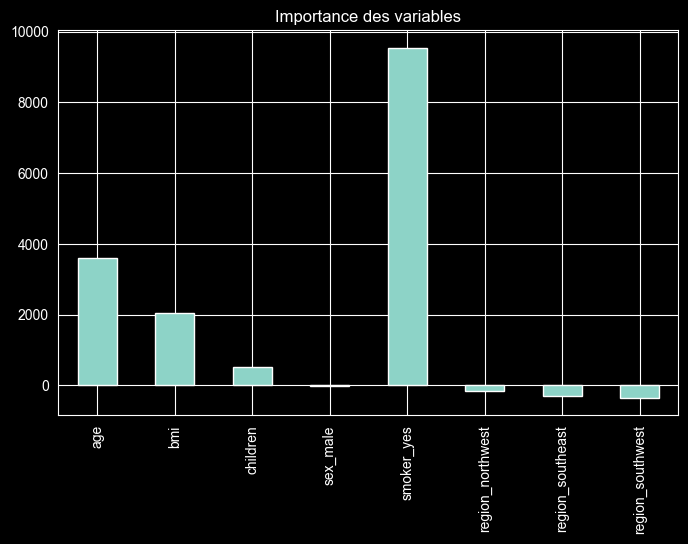

In [19]:
# Interprétation des coefficients sur les variables standardisées
coef_df['Coefficient'].plot(kind='bar', figsize=(8,5), title="Importance des variables")
plt.show()


Le graphique nous donne une idée visuelle de l'influence des variables (standardisées) sur les charges. En effet, il est possible de voir que l'âge et le tabagisme sont les facteurs les plus influents sur les charges moyennes.

Ces coefficients représentent l'impact moyen d’une variation d’un écart-type dans chaque variable sur le coût de l’assurance

Allons maintenant effectuer la même analyse avec les unités réelles


In [20]:
# Recalculer les coefficients en unités réelles
# Diviser par l'écart-type de chaque variable
coef_original = lr_model.coef_ / scaler.scale_

# Ajuster l'intercept - prédiction de base en dollars
intercept_original = lr_model.intercept_ - sum(coef_original * scaler.mean_)

coef_df_real = pd.DataFrame(coef_original, index=X_encoded.columns, columns=['Coefficient'])
coef_df_real


,Coefficient
age,256.975706
bmi,337.092552
children,425.278784
sex_male,-18.591692
smoker_yes,23651.128856
region_northwest,-370.677326
region_southeast,-657.864297
region_southwest,-809.799354


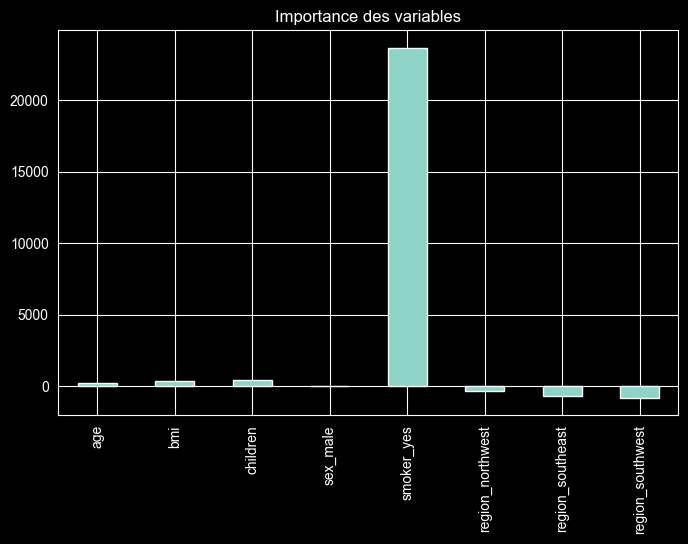

In [21]:
# Interprétation des coefficients sur les variables réelles
coef_df_real['Coefficient'].plot(kind='bar', figsize=(8,5), title="Importance des variables")
plt.show()

En gardant constantes toutes les variables sauf celle analysée :
- L'augmentation d'une unité d'âge (1 année) fait augmenter la variable cible de 256 \$
- L'augmentation d'un point du BMI fait augmenter la variable cible de 337 \$
- L'augmentation d'un enfant à charge fait augmenter la variable cible de 425 \$
- Les personnes de sexe masculin ont une diminution des charges de 18 $ par rapport aux personnes de sexe féminin
- Les fumeurs ont une augmentation des charges de 23'651 \$ par rapport aux non fumeurs
- L'augmentation d'un enfant à charge fait augmenter la variable cible de 425 \$
- Les personnes venant d'une région du northwest ont une diminution des charges de 370 \$ par rapport aux personnes venant d'une région du northeast
- Les personnes venant d'une région du southeast ont une diminution des charges de 657 \$ par rapport aux personnes venant d'une région du northeast
- Les personnes venant d'une région du southwest ont une diminution des charges de 809 \$ par rapport aux personnes venant d'une région du northeast

**Différences du coefficient avec variables standardisées et avec variables réelles** <br>
Les coefficients standardisés et les coefficients en unités réelles sont différents :
- Les coefficients standardisés montrent l’effet d’une variation d’un écart-type de chaque variable sur les charges
- Les coefficients en unités réelles montrent l’effet d'une variation d’une unité réelle

Les deux interprétations sont correctes, mais l'ordre d'importance peut varier. Le coefficient standardisé compare les variables sur la même échelle, ce qui montre une importance globale, alors que le coefficient sur les unités réelles montre plutôt l'effet pratique de la variation d'une unité.



# Régression linéaire

### Comparaison des valeurs réelles et des valeurs prédites
Ce graphique compare les valeurs réelles aux valeurs prédites par le modèle.
Une bonne performance du modèle est donnée par des points proches de la diagonale


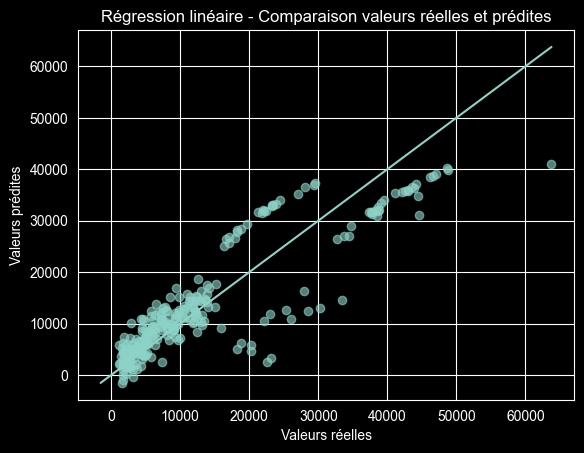

In [22]:
# Nuage de points, chaque point représente une observation
plt.scatter(y_test, y_pred_lr, alpha=0.6)


# Valeur min et max des deux axes pour le traçage de la diagonale
min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())

# Traçage de la diagonale idéale
plt.plot([min_val, max_val], [min_val, max_val])

# Labels et titre
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Régression linéaire - Comparaison valeurs réelles et prédites")

# Affichage du graphique
plt.show()


Le modèle de régression linéaire utilisé est multivarié, avec un espace de dimension égale au nombre de variables explicatives.
Cependant, une représentation graphique directe en haute dimension n’est pas possible.

La visualisation en deux dimensions reste néanmoins pertinente, car elle permet d’analyser des projections du modèle en isolant l’effet d’une variable explicative sur la variable cible.
Ces graphiques facilitent l’observation des tendances générales, la détection de structures telles que des bandes ou une hétérogénéité des données, et mettent en évidence les limites d’un modèle linéaire.

Ainsi, bien que le modèle soit multivarié, les graphiques 2D constituent des projections utiles pour analyser l’effet marginal de certaines variables.


**Analyse du graphique - Régression linéaire** <br>
Il est possible de voir une bonne tendance générale, lorsque la valeur réelle augmente, la valeur prédite augmente également. Cependant, il y a une dispersion assez forte des points par rapport à la diagonale.

- Valeurs faibles : bonne prédiction
- Valeurs moyennes : beaucoup d'erreurs
- Valeurs élevées : sous estimation et sur estimation

La régression linéaire est correcte pour les coûts faibles et moins fiable pour les valeurs élevées. Cette différence peut se traduire par le fait que la relation réelle entre les variables n’est pas strictement linéaire sur toute la plage de données.

Cette régression est limitée par des groupes séparés de points.
Les difficultés du modèle à prédire les charges moyennes et élevées viennent d'une relation qui n'est pas strictement linéaire entre les variables et les charges. Des meilleurs résultats pourraient ressortir avec l'utilisation de modèles plus complexes.

**Statistique sur les erreurs de prédictions** <br>
Afin d'avoir une vue plus détaillée sur ces erreurs, il est intéressant d'en extraire quelques statistiques.

In [23]:
# Calcul des statistiques des erreurs absolues
abs(y_test - y_pred_lr).describe()

count      268.000000
mean      4181.194474
std       4021.800923
min         10.164801
25%       1302.336932
50%       2695.139463
75%       6292.751026
max      22850.136498
Name: charges, dtype: float64

**Analyse des stats**<br>
- En moyenne, le modèle se trompe d'environ 4'191 \$ par prédiction
- Les erreurs sont dispersées, les prédictions sont parfois très correctes et parfois très mauvaises, ce qui ressort très bien du graphique. L'écart-type, la dispersion est d'environ 4'000 \$
- Certaines prédictions sont très précises, avec une erreur d'environ 10 \$
- Le 25% des prédictions ont une erreur d'environ 1'300 \$
- Le 50% des prédictions ont une erreur d'environ 2'600 \$
- Le 75% des prédictions ont une erreur d'environ 6200 \$
- Certaines prédictions sont très fausses, avec une erreur d'environ 22'800 \$ et ceci, comme on peut remarquer dans le graphique arrive avec les charges les plus élevées

# K-Nearest Neighbors (KNN)

Nous allons maintenant évaluer ces données avec un modèle non paramétrique, c'est-à-dire sans un paramètre fixe à estimer.

Le K-NN est une méthode d'apprentissage supervisée. Le fonctionnement se base sur la prévision d'une variable cible en identifiant les K observations les plus proches dans l'espace des variables (non cible) et ensuite calcule la moyenne de leurs valeurs cibles.

Nous utiliserons des données standardisées, car le modèle est sensible à l'échelle des variables - la standardisation nous a permis de mettre les variables sur une même échelle.

In [24]:
# Import du modèle K-NN pour la régression
from sklearn.neighbors import KNeighborsRegressor

In [25]:
# Initialisation du modèle K-NN
# On choisit ici K = 5 voisins (valeur par défaut)
# Le nombre de voisins k a été fixé à 5 afin de trouver un compromis entre biais et variance.
# Une valeur trop faible de k rendrait le modèle sensible au bruit, tandis qu’une valeur trop élevée conduirait à une perte de précision.
knn_model = KNeighborsRegressor(n_neighbors=5)

# Entraînement du modèle sur les données d'entraînement
knn_model.fit(X_train, y_train)


KNeighborsRegressor()

In [26]:
# Prédictions sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Calcul des métriques
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("MSE :", mse_knn, "\nRMSE :", rmse_knn, "\nMAE :", mae_knn, "\nR2 score :", r2_knn)


MSE : 30618142.460554037 
RMSE : 5533.366286498124 
MAE : 3514.2022186455224 
R2 score : 0.8027800796415753


Comme pour le modèle de régression linéaire, les performances du modèle K-NN sont calculés avec les métriques : MSE, RMSE, MAE et $R^2$.


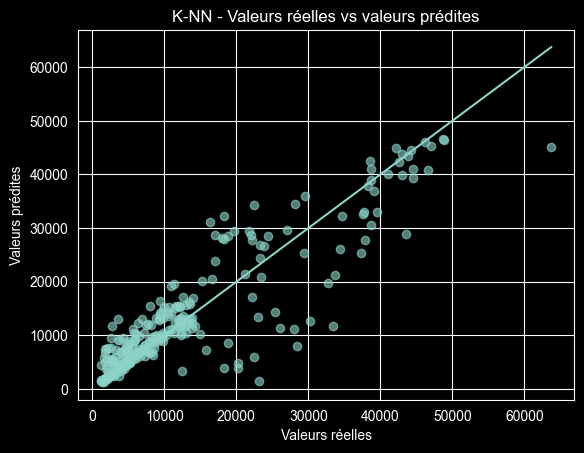

In [27]:
# Nuage de points, chaque point représente une observation
plt.scatter(y_test, y_pred_knn, alpha=0.6)

# Valeur min et max des deux axes pour le traçage de la diagonale
min_val = min(y_test.min(), y_pred_knn.min())
max_val = max(y_test.max(), y_pred_knn.max())

# Traçage de la diagonale idéale
plt.plot([min_val, max_val], [min_val, max_val])

# Labels et titre
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("K-NN - Valeurs réelles vs valeurs prédites")

# Affichage du graphique
plt.show()


**Choix du graphique** <br>
Le graphique valeurs réelles vs valeurs prédites est particulièrement adapté à l’évaluation d’un modèle de régression K-NN.
Ce type de visualisation est indépendant du modèle et permet d’évaluer directement la qualité des prédictions en comparant, pour chaque observation, la valeur prédite à la valeur réelle.

La diagonale représente la prédiction idéale (y = x). La proximité des points par rapport à cette diagonale indique le niveau de précision du modèle, tandis que leur dispersion permet d’identifier les zones où les erreurs sont plus importantes.
<br>

**Analyse du graphique** <br>
Les points sont globalement proches de la diagonale, ce qui indique une bonne adéquation entre les valeurs réelles et les valeurs prédites, en particulier pour les valeurs moyennes et élevées. Le modèle K-NN parvient ainsi à bien capter les relations non linéaires présentes dans les données.

Cela s’explique par le fait que le K-NN base ses prédictions sur les observations les plus proches (voisins similaires), ce qui permet d’améliorer la précision locale des prédictions.

Cependant, une certaine dispersion demeure, notamment pour les valeurs les plus élevées, ce qui indique que le modèle n’est pas précis dans tous les cas.

**Réprésentation résidus en fonciton des valeurs prédites**
<br>Les valeurs résidues sont :

$$résidu = y_{\text{réel}} - y_{\text{prédit}}$$
<br>
Dans le modèle, chaque point représente l’erreur du modèle pour une observation

Text(0.5, 1.0, 'Résidus en fonction des valeurs prédites (K-NN)')

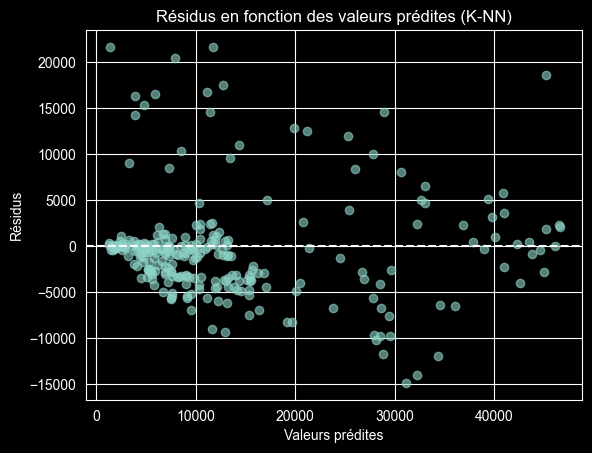

In [28]:
# Calcul des résidus
residuals = y_test - y_pred_knn

# Graphique résidus vs valeurs prédites
plt.scatter(y_pred_knn, residuals, alpha=0.6)
# Ligne horizontale au niveau de x=0
plt.axhline(0, linestyle='--')

# Labels et titre
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus")
plt.title("Résidus en fonction des valeurs prédites (K-NN)")

Le graphique des résidus en fonction des valeurs prédites montre que les erreurs sont globalement centrées autour de zéro, indiquant l’absence de biais systématique du modèle K-NN.
Cependant, la dispersion des résidus augmente pour les valeurs prédites élevées, suggérant une précision plus faible pour les individus présentant des coûts importants.
La présence de valeurs extrêmes met en évidence certaines observations atypiques, probablement liées à des profils peu représentés dans les données.

**Comparaison des graphiques entre régression linéaire et K-NN** <br>
La proximité des points par rapport à la diagonale est globalement meilleure pour le modèle K-NN. Cela signifie que les prédictions, en particulier pour les grandes valeurs, sont plus précises avec le K-NN.

Contrairement à la régression linéaire, le modèle K-NN prend en compte les relations non linéaires entre les variables. La régression linéaire, quant à elle, repose sur une hypothèse de linéarité qui limite sa capacité à modéliser des relations plus complexes.

Il est donc possible d’affirmer que le modèle K-NN présente de meilleures performances de prédiction que la régression linéaire. Toutefois, la régression linéaire reste plus facilement interprétable. Elle montre néanmoins des limites importantes, notamment une sous-estimation des grandes valeurs, tandis que le modèle K-NN s’adapte mieux aux structures non linéaires des données.

**Comparaison des métriques entre régression linéaire et k-nn**

In [29]:
# Tableau comparatif des métriques
results_df = pd.DataFrame({
    "Modèle": ["Régression Linéaire", "K-NN"],
    "MSE": [mse_lr, mse_knn],
    "RMSE": [rmse_lr, rmse_knn],
    "MAE": [mae_lr, mae_knn],
    "R²": [r2_lr, r2_knn]
})

# Print du tableau
results_df


,Modèle,MSE,RMSE,MAE,R²
0,Régression Linéaire,3.359692e+07,5796.284659,4181.194474,0.783593
1,K-NN,3.061814e+07,5533.366286,3514.202219,0.802780


La comparaison des métriques montre que :

- La régression linéaire offre une bonne capacité explicative globale (R² élevé), mais reste limitée par sa linéarité
- Le modèle K-NN, peut mieux capturer certaines relations non linéaires, mais sa performance dépend fortement du choix du nombre de voisins.

# Arbre de décision

C'est un modèle d'apprentissage supervisé qui segmente l’espace des données en plusieurs régions à l’aide de règles successives.
En effet, chaque feuille de l’arbre correspond à une prédiction moyenne des observations.
Ce modèle est capable de capturer des relations non linéaires et les interactions entre les variables.

In [30]:
# Import de la librairie pour l'utilisation de l'arbre de décision
from sklearn.tree import DecisionTreeRegressor

# Initialisation du modèle
# max_depth est fixé pour éviter le sur-apprentissage
dt_model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Entraînement du modèle
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [31]:
# Prédictions de l'arbre de décision
y_pred_dt = dt_model.predict(X_test)

In [32]:
# Calcul des métriques pour l'arbre de décision
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print des métriques
print("MSE :", mse_dt, "\nRMSE :", rmse_dt, "\nMAE :", mae_dt, "\nR2 score :", r2_dt)


MSE : 24270288.99377663 
RMSE : 4926.488505393739 
MAE : 2869.6317429852065 
R2 score : 0.8436683587648979


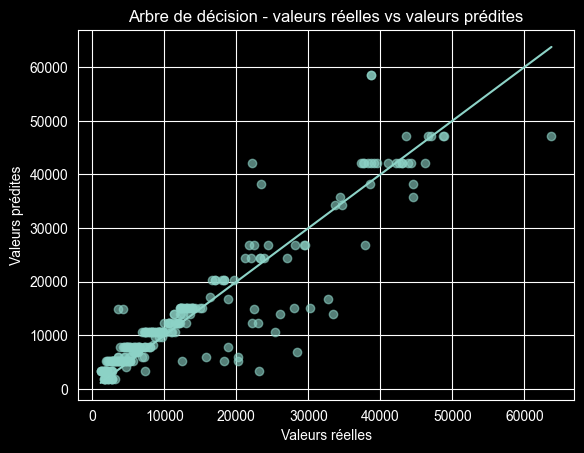

In [33]:
# Nuage de points, chaque point représente une observation
plt.scatter(y_test, y_pred_dt, alpha=0.6)

# Valeur min et max des deux axes pour le traçage de la diagonale
min_val = min(y_test.min(), y_pred_dt.min())
max_val = max(y_test.max(), y_pred_dt.max())

# Traçage de la diagonale idéale
plt.plot([min_val, max_val], [min_val, max_val])

# Labels et titre
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Arbre de décision - valeurs réelles vs valeurs prédites")

# Affichage du graphique
plt.show()

**Choix du graphique** <br>
Comme pour le knn, dans le cas de l’arbre de décision, ce graphique permet de comparer directement les prédictions du modèle aux valeurs observées et d’évaluer sa capacité à approximer la variable cible.<br>

**Analyse du graphique** <br>
Dans le graphique, il est possible de voir que les points sont globalement bien alignés autour de la diagonale, ce qui indique une bonne correspondance entre les valeurs réelles et les valeurs prédites.
Ce modèle arrive à modéliser correctement la relation entre les variables, y compris pour des valeurs moyennes et élevées.

Il est possible de voir que des regroupements horizontaux se créent à cause des prédictions par paliers en fonction des règles de découpage de l'espace des données.

L’arbre de décision capte efficacement les relations non linéaires et les interactions entre les variables, sans imposer d’hypothèse de linéarité. Cela permet d’obtenir de bonnes performances globales, notamment comparées à un modèle linéaire.

Il est encore possible de voir une dispersion pour les valeurs élevée. Ceci implique un manque de précision pour une région donnée de l'espace des données.

**Comparaison des graphiques, régression linéaire, K-NN et arbre de décision** <br>
L’arbre de décision permet de capturer certaines relations non linéaires présentes dans les données, contrairement aux modèles linéaires. Grâce à son fonctionnement basé sur des règles de séparation successives, il est capable de modéliser des interactions complexes entre les variables explicatives et la variable cible.

Cependant, ce modèle peut être sujet au sur-apprentissage si sa profondeur n’est pas contrôlée. Un arbre trop profond a tendance à s’ajuster excessivement aux données d’entraînement, y compris au bruit, ce qui peut dégrader ses performances sur de nouvelles données. Il est donc nécessaire de mettre en place des mécanismes de régularisation, tels que la limitation de la profondeur maximale et le nombre minimal d’observations.

**Comparaison des métriques entre régression linéaire, K-NN et arbre de décision**

In [34]:
# Tableau comparatif des métriques
results_df = pd.DataFrame({
    "Modèle": ["Régression Linéaire", "K-NN", "Arbre de Décision"],
    "MSE": [mse_lr, mse_knn, mse_dt],
    "RMSE": [rmse_lr, rmse_knn, rmse_dt],
    "MAE": [mae_lr, mae_knn, mae_dt],
    "R²": [r2_lr, r2_knn, r2_dt]
})

# Print du tableau
results_df


,Modèle,MSE,RMSE,MAE,R²
0,Régression Linéaire,3.359692e+07,5796.284659,4181.194474,0.783593
1,K-NN,3.061814e+07,5533.366286,3514.202219,0.802780
2,Arbre de Décision,2.427029e+07,4926.488505,2869.631743,0.843668


La comparaison des résultats montre que :

- La régression linéaire offre une bonne capacité explicative globale, mais reste limitée
- Le modèle K-NN capture mieux certaines relations locales, mais sa performance dépend fortement du choix du nombre de voisins
- L’arbre de décision permet de modéliser des relations non linéaires et les interactions entre variables, mais peut souffrir de sur-apprentissage

L'utilisation de 3 modèles différents aide à la comprhénsion des données ainsi qu'à l'identification des performances.

# Bagging – Random Forest Regressor

Le bagging consiste à entraîner plusieurs modèles sur différents sous-échantillons des données, puis à agréger leurs prédictions.

Le Random Forest est une méthode de bagging appliquée aux arbres de décision, permettant d’améliorer la robustesse et la généralisation du modèle.


In [35]:
# Import de la librairie pour l'utilisation du random forest regressor
from sklearn.ensemble import RandomForestRegressor

# Initialisation du modèle
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

# Entraînement du modèle
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# Prédictions du random forest regressor
y_pred_rf = rf_model.predict(X_test)

# Calcul des métriques pour l'arbre de décision
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print des métriques
print("MSE :", mse_rf, "\nRMSE :", rmse_rf, "\nMAE :", mae_rf, "\nR2 score :", r2_rf)



MSE : 20866223.19798948 
RMSE : 4567.956129166466 
MAE : 2545.214924655166 
R2 score : 0.8655948876523016


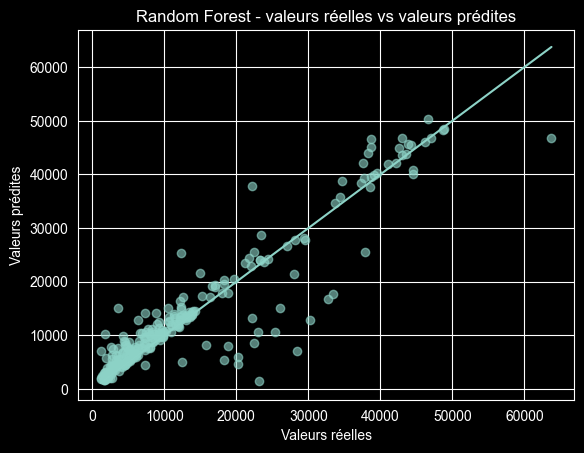

In [37]:
# Nuage de points, chaque point représente une observation
plt.scatter(y_test, y_pred_rf, alpha=0.6)

# Valeur min et max des deux axes pour le traçage de la diagonale
min_val = min(y_test.min(), y_pred_rf.min())
max_val = max(y_test.max(), y_pred_rf.max())

# Traçage de la diagonale idéale
plt.plot([min_val, max_val], [min_val, max_val])

# Labels et titre
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Random Forest - valeurs réelles vs valeurs prédites")

# Affichage du graphique
plt.show()


Le nuage de points montre que le Random Forest améliore la qualité des prédictions par rapport aux modèles précédents.
Les points sont globalement plus proches de la diagonale idéale, ce qui indique une réduction des erreurs de prédiction.

Cependant, certaines dispersions subsistent pour les valeurs élevées, ce qui montre que le modèle n’est pas parfaitement précis.


# Boosting – Gradient Boosting Regressor

Le boosting est une technique d’ensemble qui entraîne les modèles de manière séquentielle.
Chaque nouveau modèle cherche à corriger les erreurs du précédent.

Le Gradient Boosting est une méthode de boosting très efficace pour les problèmes de régression.


In [38]:
# Import de la librairie pour l'utilisation du gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialisation du modèle
gb_model = GradientBoostingRegressor(random_state=42)

# Entraînement du modèle
gb_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [39]:
# Prédictions du random forest regressor
y_pred_gb = gb_model.predict(X_test)

# Calcul des métriques pour l'arbre de décision
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print des métriques
print("MSE :", mse_gb, "\nRMSE :", rmse_gb, "\nMAE :", mae_gb, "\nR2 score :", r2_gb)




MSE : 18811586.96628486 
RMSE : 4337.23263917038 
MAE : 2448.2125209337787 
R2 score : 0.8788293676507002


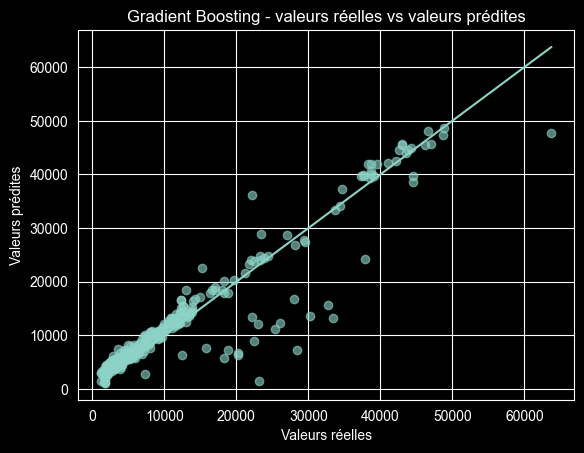

In [40]:
# Nuage de points, chaque point représente une observation
plt.scatter(y_test, y_pred_gb, alpha=0.6)

# Valeur min et max des deux axes pour le traçage de la diagonale
min_val = min(y_test.min(), y_pred_gb.min())
max_val = max(y_test.max(), y_pred_gb.max())

# Traçage de la diagonale idéale
plt.plot([min_val, max_val], [min_val, max_val])

# Labels et titre
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Gradient Boosting - valeurs réelles vs valeurs prédites")

# Affichage du graphique
plt.show()


Le Gradient Boosting offre généralement les meilleures performances parmi les modèles testés.
Il permet de capturer des relations complexes tout en conservant une bonne capacité de généralisation.


In [41]:
# Tableau comparatif des métriques
results_df = pd.DataFrame({
    "Modèle": [
        "Régression Linéaire",
        "K-NN",
        "Arbre de Décision",
        "Random Forest",
        "Gradient Boosting"
    ],
    "MSE": [mse_lr, mse_knn, mse_dt, mse_rf, mse_gb],
    "RMSE": [rmse_lr, rmse_knn, rmse_dt, rmse_rf, rmse_gb],
    "MAE": [mae_lr, mae_knn, mae_dt, mae_rf, mae_gb],
    "R²": [r2_lr, r2_knn, r2_dt, r2_rf, r2_gb]
})

# Print du tableau
results_df


,Modèle,MSE,RMSE,MAE,R²
0,Régression Linéaire,3.359692e+07,5796.284659,4181.194474,0.783593
1,K-NN,3.061814e+07,5533.366286,3514.202219,0.802780
2,Arbre de Décision,2.427029e+07,4926.488505,2869.631743,0.843668
3,Random Forest,2.086622e+07,4567.956129,2545.214925,0.865595
4,Gradient Boosting,1.881159e+07,4337.232639,2448.212521,0.878829


### Importance des variables

Les modèles de type Random Forest permettent d’estimer l’importance relative de chaque variable
dans la prédiction de la variable cible. Ce qui diffère de l'analyse de l'importance des variables effectuée préalablement.
L'importance analysée précédemment se base sur des coefficients, elle suppose une relation linéaire et est sensible à la standardisation.

Cette analyse permet d’identifier les facteurs les plus influents dans la prédiction des coûts, se base sur la réduction des erreurs dans les arbres, elle capture les relations non linéaires et est indépendante de l'échelle des valeurs.

In [42]:
# feature_importances_ renvoie l'importance de chaque variable selon le Random Forest. Plus l'importance est grande, plus la variable contribue à réduire l'erreur dans les arbres.
importances = rf_model.feature_importances_

# X_encoded.columns contient les noms des variables après encodage one-hot, (ex. smoker_yes, region_southwest, etc.)
feature_names = X_encoded.columns

# Création d'un DataFrame pour afficher les importances de manière lisible
importance_df = pd.DataFrame({
    "Variable": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False) # Tri des valeurs par importance

# Affichage du tableau des importances
importance_df

,Variable,Importance
4,smoker_yes,0.608618
1,bmi,0.216506
0,age,0.134232
2,children,0.019413
3,sex_male,0.006379
5,region_northwest,0.005587
6,region_southeast,0.005314
7,region_southwest,0.003950


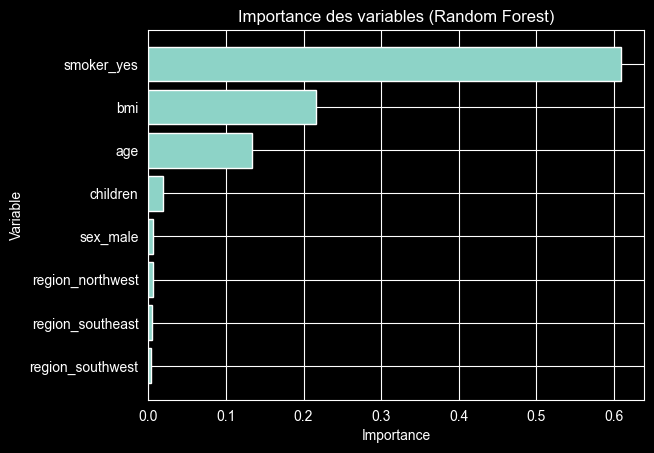

In [43]:
# Traçage des 10 variables les plus importantes par des barres horizontales
plt.barh(
    importance_df["Variable"].head(10), # Noms des variables
    importance_df["Importance"].head(10) # Valeurs d'importance
)

# Labels et titre
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.title("Importance des variables (Random Forest)")

# Inversion de l'axe Y pour avoir la variable la plus importante en haut
plt.gca().invert_yaxis()

# Affichage du graphique
plt.show()


L’analyse des importances des variables montre que le tabagisme, l’âge et le BMI
sont les variables les plus influentes dans la prédiction des charges.

__________________________________________________________________________________________________________________________________________________________________________________________________________________

## Validation croisée

Afin d’évaluer la capacité de généralisation du modèle au-delà d’un simple découpage train/test,
une validation croisée à 5 plis est réalisée.

Ceci signifie que le dataset de données est séparé en 5 sous-ensembles égaux appelés plis (folds). La validation croisée fait 5 entraînements différents :

**Itération 1**
- Entraînement : plis 2, 3, 4, 5
- Test : pli 1

**Itération 2**
- Entraînement : plis 1, 3, 4, 5
- Test : pli 2

**Itération 3**
- Entraînement : plis 1, 2, 4, 5
- Test : pli 3

**Itération 4**
- Entraînement : plis 1, 2, 3, 5
- Test : pli 4

**Itération 5**
- Entraînement : plis 1, 2, 3, 4
- Test : pli 5

Chaque observation sert une fois de test, et plusieurs fois d’entraînement.
Le résultat donne en réalité 5 random forest différents chacun entrainé sur un sous-ensemble différent.

Cette méthode consiste à entraîner les modèles avec les sous-ensembles de données afin de moyenner les performances obtenues.

In [44]:
# Import de la librairie pour l'utilisation de la validation croisée
from sklearn.model_selection import cross_val_score

# Validation croisée à 5 plis (cv=5) avec le score R²
# rf_model : la librairie Scikit-learn permet la récréation et le re entraînement d'un nouveau random forest pour chaque pli
cv_scores = cross_val_score(
    rf_model, # Modèle à évaluer
    X_scaled, # Variables standardisées
    y,        # Variable cible
    cv=5,     # Nombre de plis (folds)
    scoring="r2" # Métrique pour l'évaluation du modèle
)

print("R2 pour le fold 1 : ", cv_scores[0], "\nR2 pour le fold 2 : ", cv_scores[1], "\nR2 pour le fold 3 : ", cv_scores[2], "\nR2 pour le fold 4 : ", cv_scores[3], "\nR2 pour le fold 5 : ", cv_scores[4], "\nPerformance moyenne du modèle : ", cv_scores.mean(), "\nStabilité du modèle : ", cv_scores.std())


R2 pour le fold 1 :  0.8567671957433804 
R2 pour le fold 2 :  0.7760526464541138 
R2 pour le fold 3 :  0.8700973689802215 
R2 pour le fold 4 :  0.8261284345462481 
R2 pour le fold 5 :  0.8520695624675401 
Performance moyenne du modèle :  0.8362230416383009 
Stabilité du modèle :  0.03329571171222063


Les résultats de la validation croisée montrent que le score R² est relativement stable
d’un pli à l’autre.

La moyenne du score R² confirme la bonne capacité de généralisation du modèle, tandis que l’écart-type faible indique une performance cohérente sur différents sous-ensembles de données.

# Conclusion

Dans ce projet, nous avons appliqué plusierus méthode et modèle de Data Science afin de prédire les coûts d’assurance médicale à partir de données personnelles et médicales.

Après une phase d’exploration et de préparation des données, des modèles de Machine Learning ont été entraînés et comparés, notamment :
- la régression linéaire,
- le modèle K-NN,
- l’arbre de décision,
- le Random Forest,
- le Gradient Boosting

Les résultats montrent que les modèles d’ensemble (Random Forest et Gradient Boosting) offrent les meilleures performances, avec une réduction significative des erreurs de prédiction et une meilleure capacité explicative, mesurée par le score R².

La régression linéaire, bien que plus simple et interprétable, reste limitée par son hypothèse de linéarité et présente des erreurs plus importantes, notamment pour les charges élevées.

### Limites du projet

Ce projet présente certaines limites :

- Le jeu de données est relativement petit, ce qui peut limiter la généralisation des modèles
- Les variables disponibles sont limitées et ne prennent pas en compte d’autres facteurs potentiellement importants (antécédents médicaux détaillés, habitudes de vie, etc.)
- L’optimisation des hyperparamètres n’a été réalisée que de manière basique
- Les modèles ont été évalués sur une seule séparation train/test, sans validation croisée

Ces limites peuvent influencer les performances et la robustesse des modèles.

### Perspectives d’amélioration

Plusieurs pistes pourraient être explorées pour améliorer ce travail :

- Intégrer de nouvelles variables explicatives
- Tester d’autres modèles avancés
- Analyser plus finement les erreurs de prédiction pour identifier des sous-groupes spécifiques

Ces améliorations permettraient d’obtenir des prédictions plus précises et plus robustes.



## Références bibliographiques

[1] Choi, M. (2017). *Medical Cost Personal Dataset*. Kaggle.
https://www.kaggle.com/datasets/mirichoi0218/insurance

[2] Hastie, T., Tibshirani, R., Friedman, J. (2009). *The Elements of Statistical Learning*. Springer.

[3] Documentation officielle Scikit-learn : https://scikit-learn.org/

[4] Documentation Pandas : https://pandas.pydata.org/

[5] Documentation Matplotlib : https://matplotlib.org/
